<a href="https://colab.research.google.com/github/gittEze/LinearRegression_DeathProbability/blob/main/10_Regresi%C3%B3n_lineal_m%C3%BAltiple_con_Heart_Failure_Clinical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

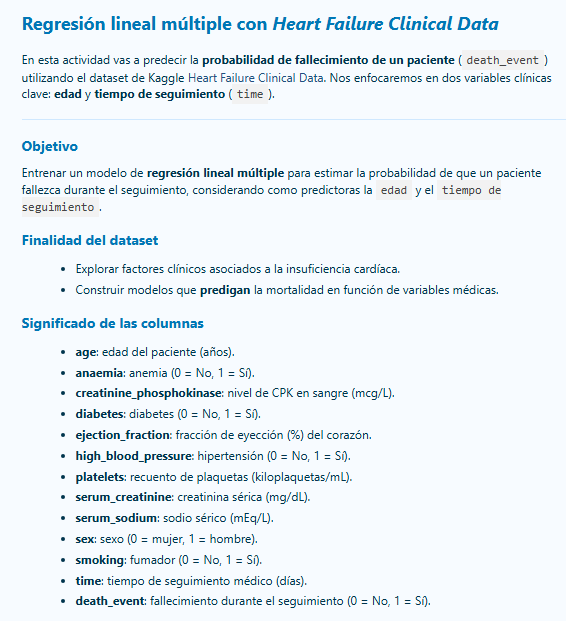

In [16]:
import pandas as pd
df = pd.read_csv('dataset.csv')

df.info(5)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
# Renombrar una por una
df = df.rename(columns={
  'age': 'edad',
  'time': 'tiempoSeg'})

df.info(5)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  tiempoSeg                 299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,edad,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,tiempoSeg,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


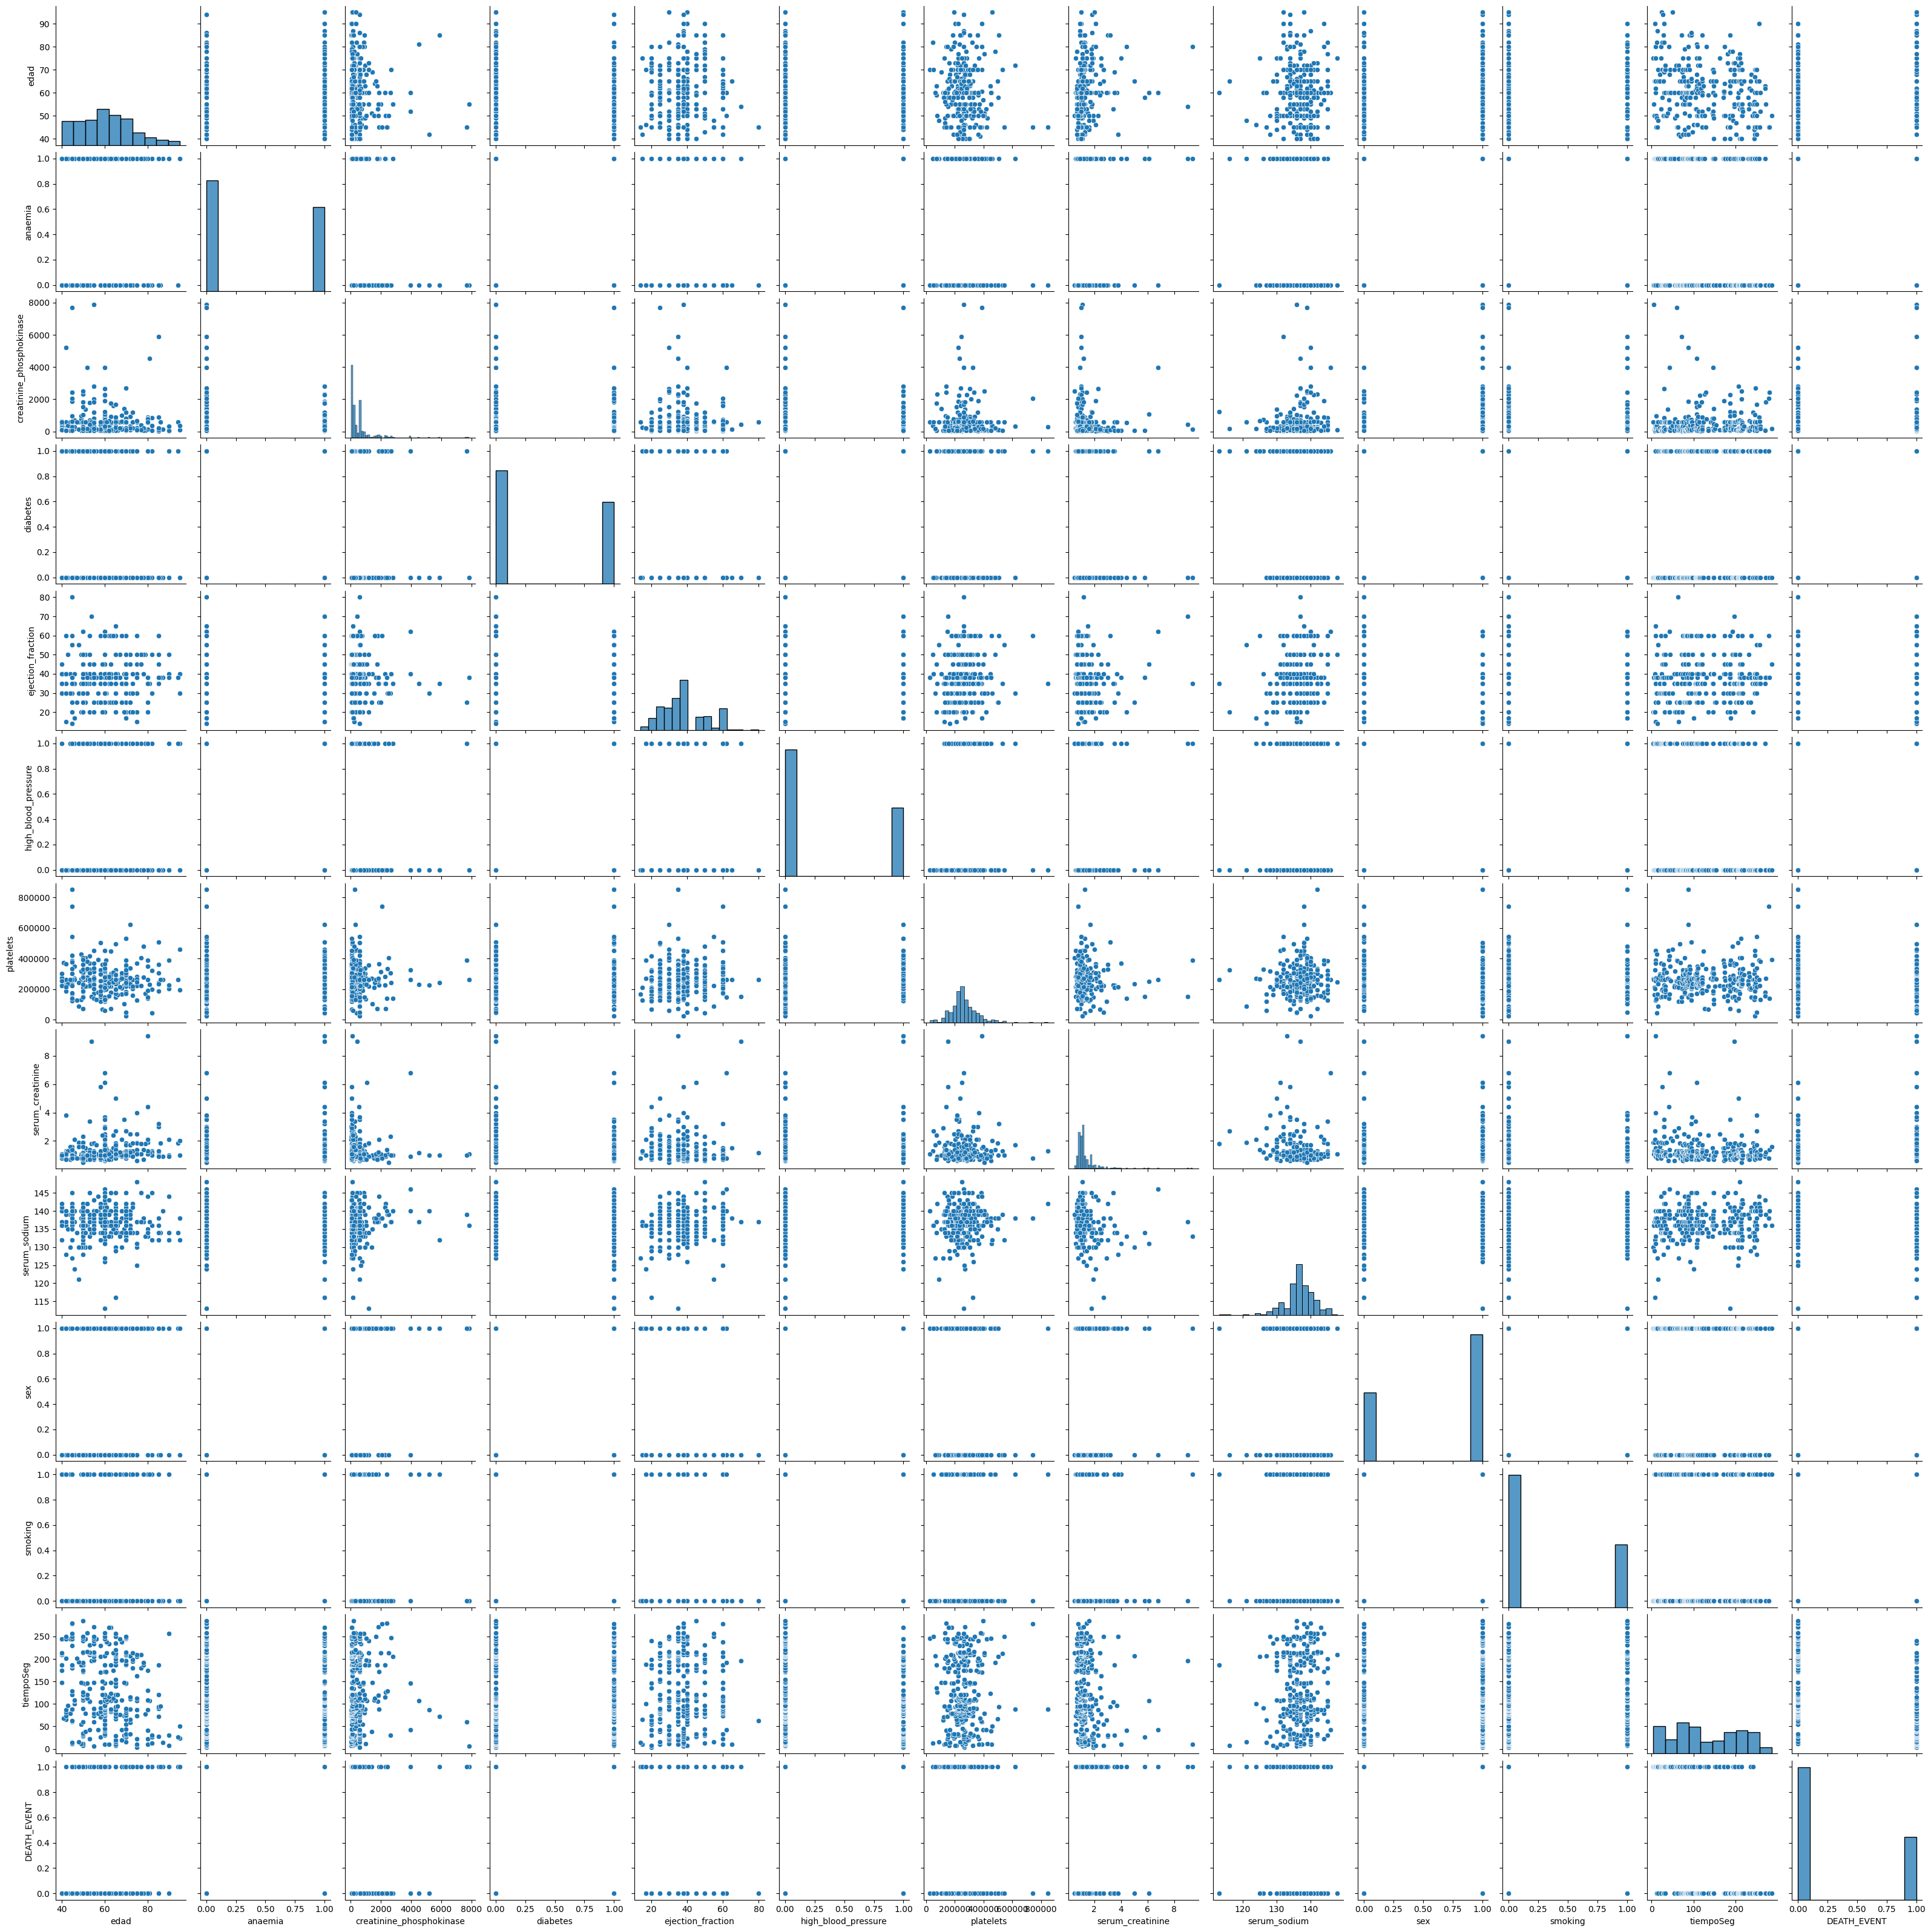

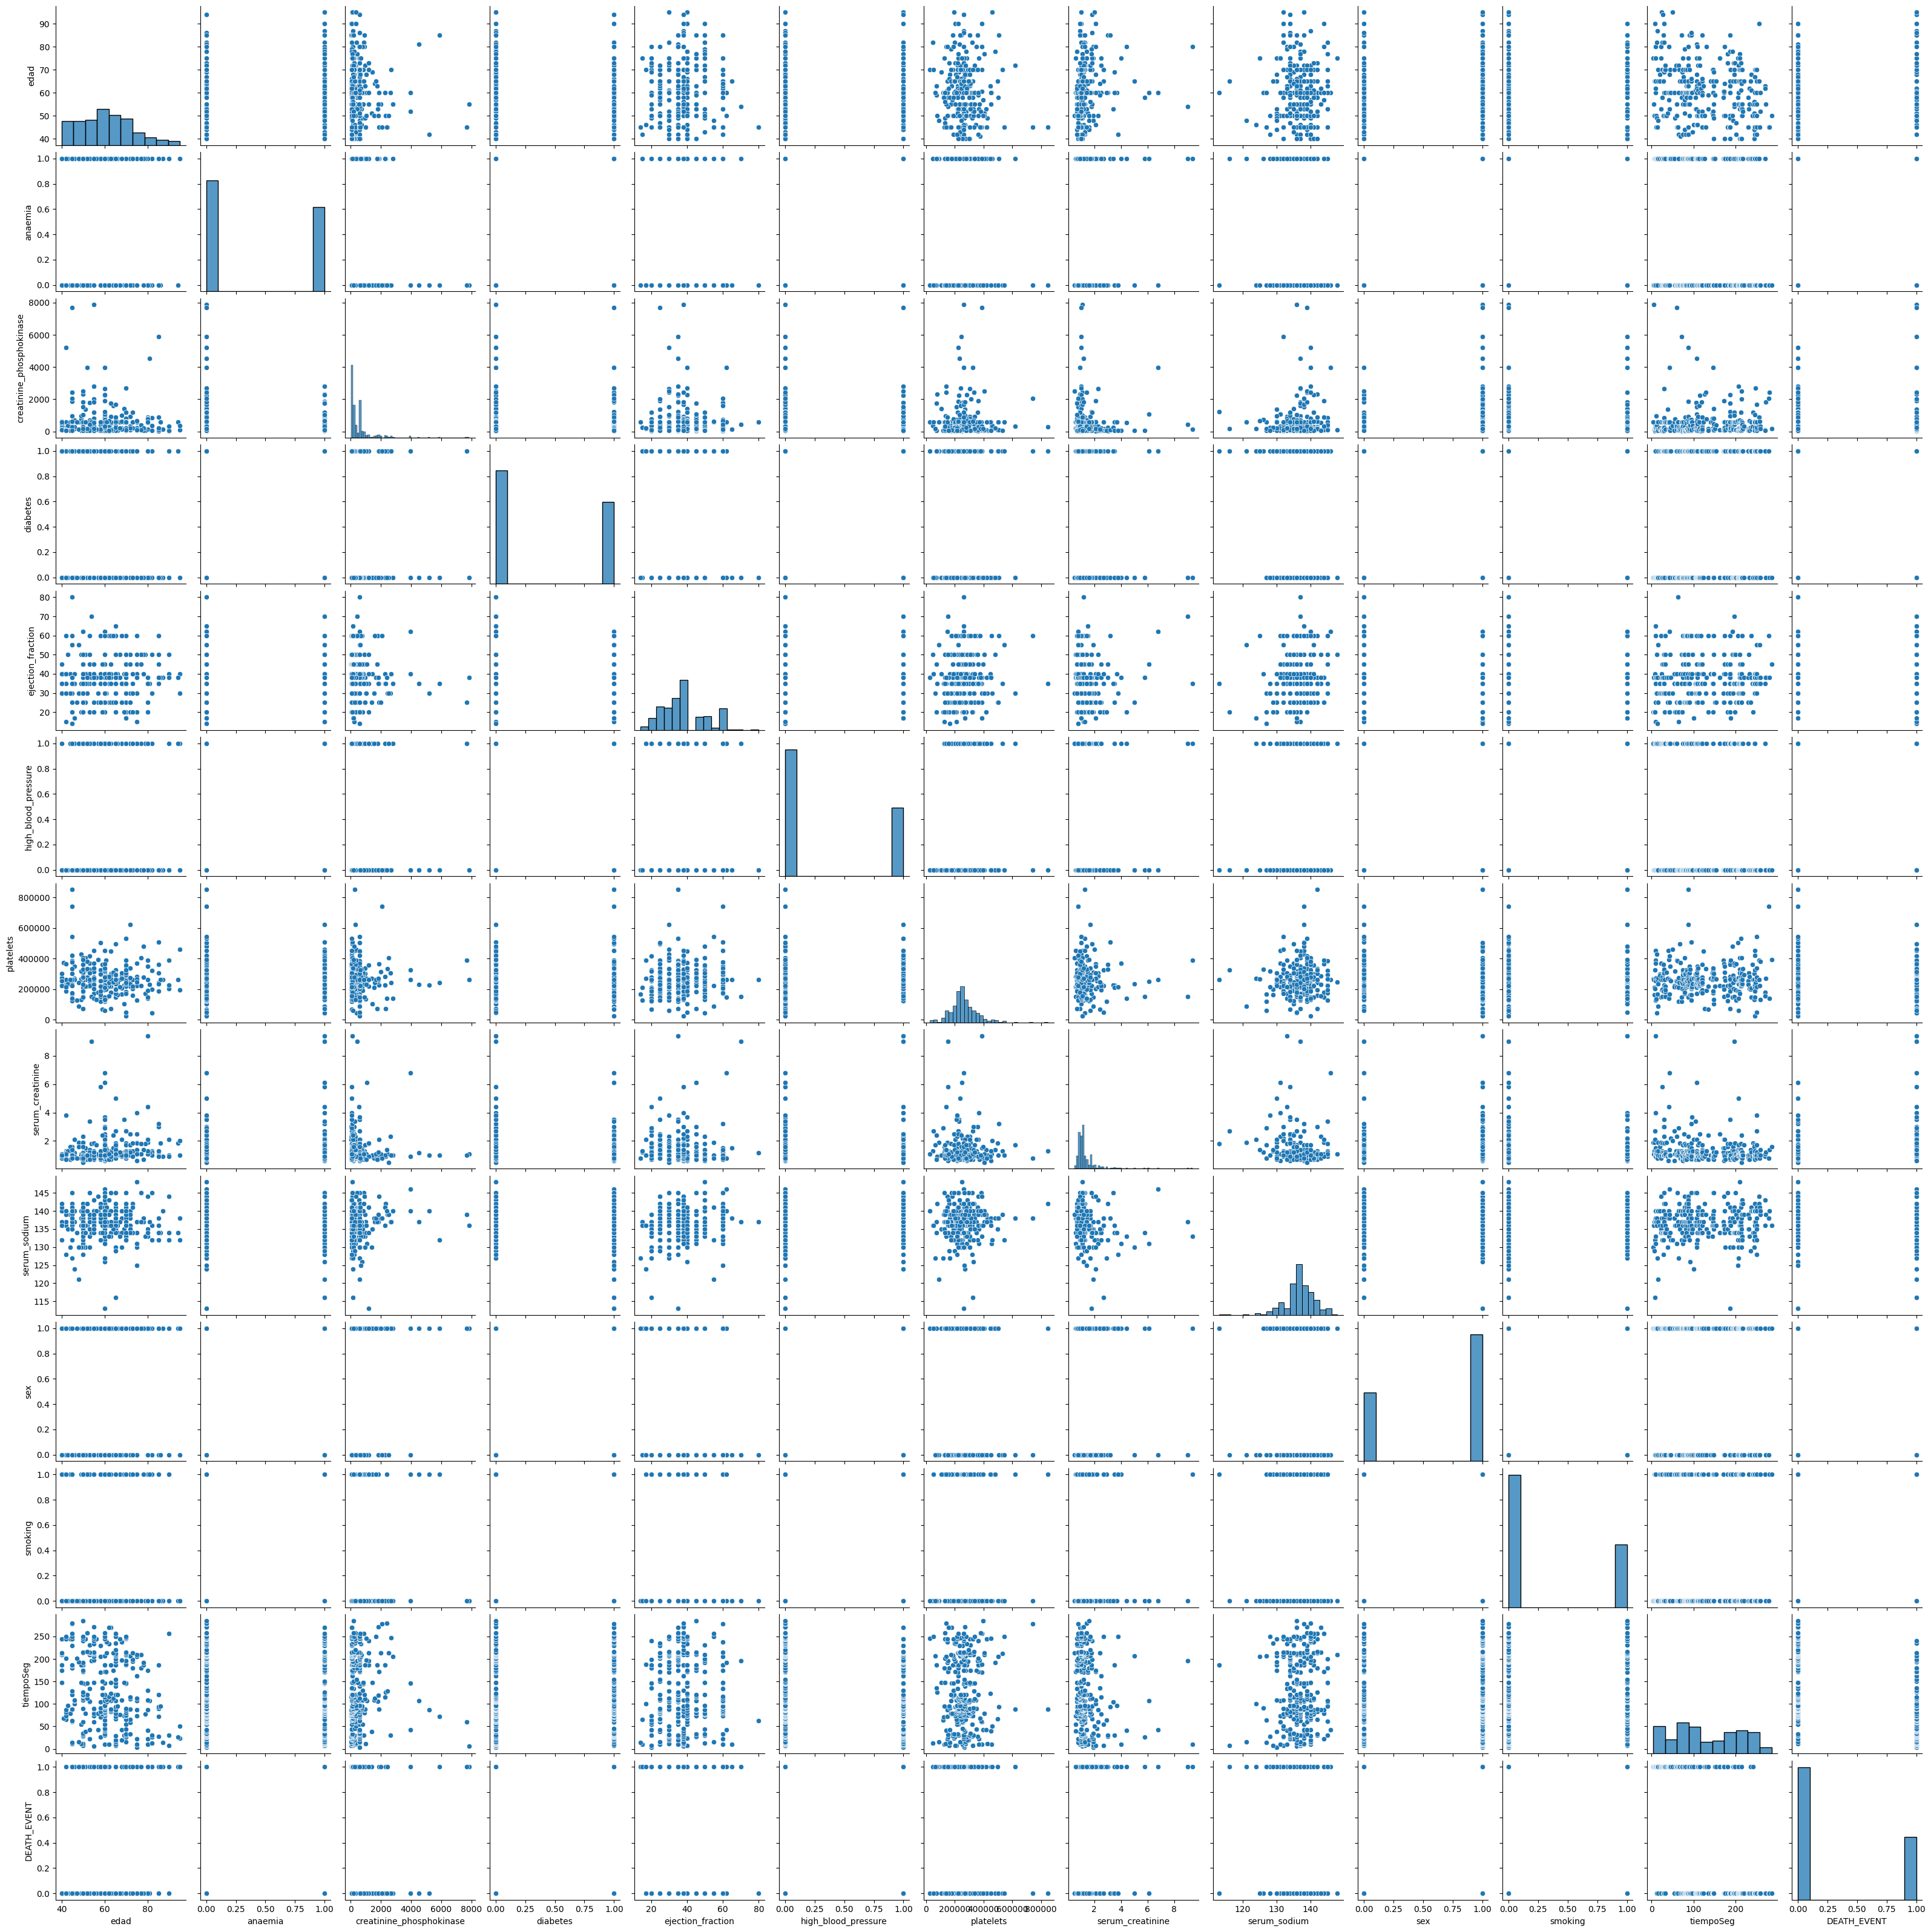

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

cols = ['edad',	'anaemia', 'creatinine_phosphokinase',	'diabetes',	'ejection_fraction', 'high_blood_pressure',	'platelets',	'serum_creatinine',	'serum_sodium',	'sex',	'smoking',	'tiempoSeg',	'DEATH_EVENT']
sns.pairplot(df[cols])
plt.show()

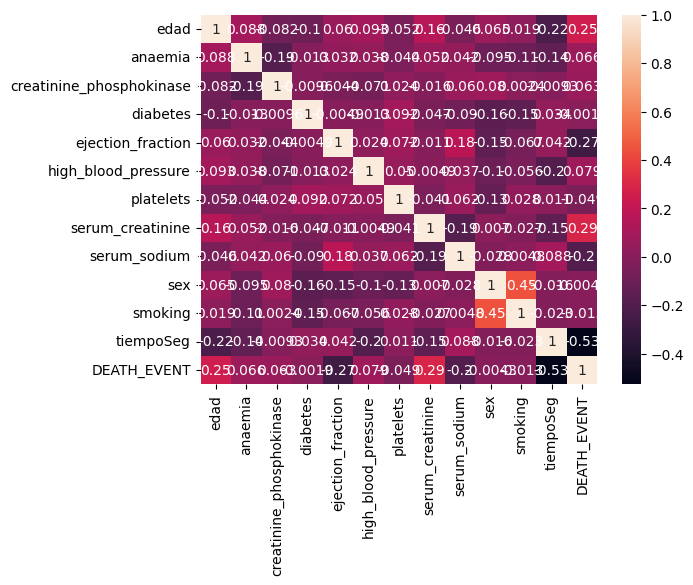

In [13]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Variables independientes
x = df[['edad', 'tiempoSeg']].values           # Cuando se ponen 2 datos o mas, no es necesario le .reshape porque ya me los trae como columna.

# Variable dependiente
y = df['DEATH_EVENT'].values.reshape(-1, 1)    # Hace falta el .reshape porque al ser solo 1 dato lo trae como array y lo convierte a columna

sx = StandardScaler()
sy = StandardScaler()

X_s = sx.fit_transform(x)
Y_s = sy.fit_transform(y)

# Creacion del modelo
lr = LinearRegression()
lr.fit(X_s, Y_s)

LinearRegression()

In [61]:
import numpy as np

edad = float(input("Ingrese la edad: "))
seguimiento = float(input("Ingrese el tiempo de seguimiento: "))

# s = estandar

# entrada estandarizada
input_s = sx.transform(np.array([[edad, seguimiento]]))

# salida estandarizada
output_s = lr.predict(input_s)

# salida des-estandarizada
output = sy.inverse_transform(output_s)

print("El rendimiento aproximado es: ", round(output[0][0] * 100, 2), " %.")

Ingrese la edad: 85
Ingrese el tiempo de seguimiento: 18
El rendimiento aproximado es:  79.16  %.


        Edad  TiempoSeguimiento(días)  ProbabilidadMuerte(%)
0  40.000000                      0.0                  64.14
1  45.555556                      0.0                  65.66
2  51.111111                      0.0                  67.15
3  56.666667                      0.0                  68.61
4  62.222222                      0.0                  70.03
5  67.777778                      0.0                  71.41
6  73.333333                      0.0                  72.76
7  78.888889                      0.0                  74.06
8  84.444444                      0.0                  75.33
9  90.000000                      0.0                  76.55


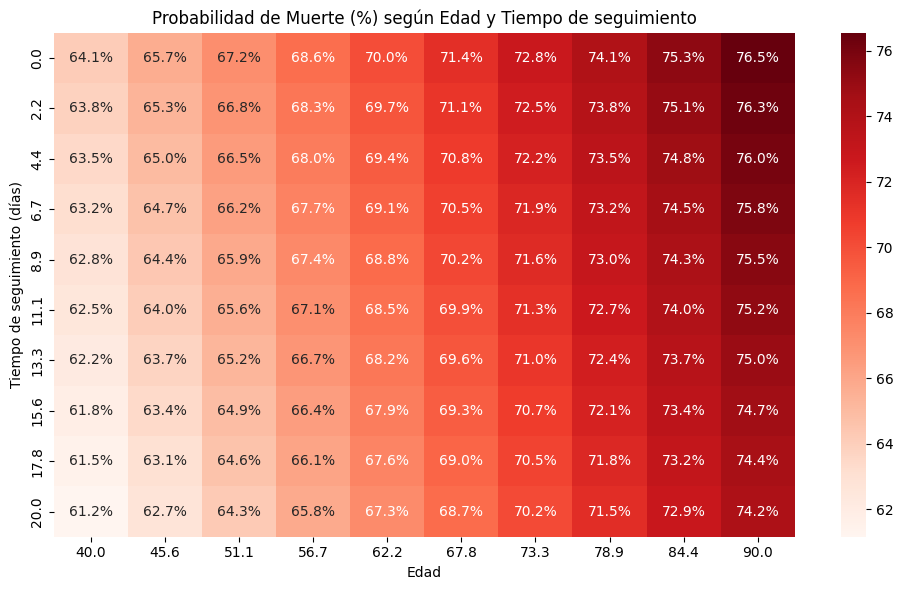

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función sigmoide para convertir salida a "probabilidad"
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Crear combinaciones de edad y tiempo en días
edades = np.linspace(40, 90, 10)              # 10 edades entre 40 y 90
tiempos_dias = np.linspace(0, 20, 10)        # 10 tiempos de seguimiento en días (0 a 20)
edad_grid, tiempo_grid = np.meshgrid(edades, tiempos_dias)

# Combinar en matriz de entrada
input_grid = np.column_stack((edad_grid.ravel(), tiempo_grid.ravel()))

# Estandarizar entrada
input_s = sx.transform(input_grid)

# Predecir salida y aplicar sigmoide
output_s = lr.predict(input_s)
output_probs = sigmoid(output_s) * 100   # Convertir a porcentaje

# Tabla de ejemplos
tabla = pd.DataFrame({
    'Edad': input_grid[:, 0],
    'TiempoSeguimiento(días)': input_grid[:, 1],
    'ProbabilidadMuerte(%)': np.round(output_probs.flatten(), 2)
})

# Mostrar primeras filas de la tabla
print(tabla.head(10))

# Matriz para heatmap
matriz_probs = output_probs.reshape(len(tiempos_dias), len(edades))

# Crear matriz de strings con % para anotación
annot_matrix = np.array([f"{v:.1f}%" for v in matriz_probs.flatten()]).reshape(matriz_probs.shape)

# Gráfico de calor plano
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_probs,
            xticklabels=np.round(edades, 1),
            yticklabels=np.round(tiempos_dias, 1),
            cmap='Reds',
            annot=annot_matrix,  # anotaciones con %
            fmt='')              # fmt se ignora porque usamos strings

plt.xlabel('Edad')
plt.ylabel('Tiempo de seguimiento (días)')
plt.title('Probabilidad de Muerte (%) según Edad y Tiempo de seguimiento')
plt.tight_layout()
plt.show()
